# Individual Assignment
## Topic: Political Reviews 
[Assignment Detail](https://classroom.google.com/u/1/c/MjcxMjM5ODc3OTZa/a/NTEyMTA1ODAyNTRa/details)

Name: **Hoo Yee Torng** </br>
Matrix: **P101447**

## Part 1 - DATA PREPARATION

### 1.1 Download the dataset
The dataset for Political reveiws are hosted on google drive. Run the code below will automatically download the file to this Colab workspace.



In [0]:
import requests

def download_dataset(url, filename):
  r = requests.get(url)
  with open(filename, 'wb') as f:
    f.write(r.content)

# DOWNLOAD NEGATIVE REVIEW FILE
url = 'https://drive.google.com/uc?id=1h2_PDZOnFf8bez_Zm2EJ01gP4sL94b-x&export=download'
neg_filename='restaurant_negative_review.csv'
download_dataset(url, neg_filename)

# DOWNLOAD POSITIVE REVIEW FILE
url = 'https://drive.google.com/uc?id=1JfdkZuWwsMAdbZk66BeY-jm9YJIu8nEp&export=download'
pos_filename='restaurant_positive_review.csv'
download_dataset(url, pos_filename)


### 1.2 Convert to Pandas Dataframe
Read the downloaded file and load it to Pandas dataframe. Assign Label to the dataframe where **0 : Negative Reviews** and **1 : Postive Reviews**. Then combined two dataframes into 1 master dataframe as **raw_df**

In [0]:
import pandas as pd

# READ FROM NEGATIVE REVIEW AND ASSIGN 0 AS CLASS VALUE
negative_df = pd.read_csv(neg_filename)
negative_df["label"] = 0

# READ FROM POSITIVE REVIEW AND ASSIGN 1 AS CLASS VALUE
positive_df = pd.read_csv(pos_filename)
positive_df["label"] = 1

# APPEND BOTH DATAFRAME AS 1
raw_df = positive_df.append(negative_df) 

# RENAME COLUMN
raw_df = raw_df.rename(columns={"Google Translate": "review"})
print(raw_df.shape)

raw_df.index = range(len(raw_df))
raw_df['review'].apply(lambda x: len(x.split(' '))).sum()

raw_df.head

(134, 2)


<bound method NDFrame.head of                                                 review  label
0    Very yummy! All the best ... Patties all juicy...      1
1           went there and I was served like a QUEENNN      1
2    Good food with reasonable price. Something new...      1
3    BEST SERVICE AND GIVING BIG IMPACT TO THE SOCI...      1
4    Best gourmet burger so far. I am also a big fa...      1
..                                                 ...    ...
129  onions always exhausted. heartache. try la mee...      0
130  server not customer friendly, ask even reply ....      0
131  Tasty but bad service!!! Wrong money change an...      0
132  Please don't come to this restaurant ,I just g...      0
133  Customer service is very severe Kepong branch....      0

[134 rows x 2 columns]>

### 1.3 Process and Cleaning
This section is to do data processing and cleaning on the reivew. Steps are shows below

* extract_word - Return only alphabert
* clean_word - Remove Special Character like http etc
* remove_stopword - remove the stopword by using ntlk librray

Create a new dataframe **df**



In [0]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def extract_words(setence):
  text = re.sub("[^a-zA-Z]", " ", setence)
  return(text.lower())

def clean_word(sentence):
  text = re.sub(r'\|\|\|', r' ', sentence) 
  text = re.sub(r'http\S+', r'<URL>', text)
  text = text.replace('x', '')
  return text

def remove_stopword(sentence):
    new_line = []
    word_tokens = nltk.word_tokenize(sentence)
    for w in word_tokens:
      if w not in stop_words:
        new_line.append(w)
    
    return (" ".join(new_line) + " ").strip()

def get_adjective_word(setence):
  words = []
  pos_spacy = ['ADJ', 'ADV']
  pos_nltk = ['JJ','JJR', 'JJS','RB','RBS','RBR']

  ## CHECK BY SPACY FIRST
  spacy_words = nlp(u''+setence+'')
  for token in spacy_words:
    if token.pos_ in pos_spacy:
      words.append(token.text)

  ## CHECK BY NLTK
  nltk_words = nltk.word_tokenize(setence)
  for stc in nltk_words:
    nltk_token = nltk.pos_tag(nltk.word_tokenize(stc))
    if nltk_token[0][1] in pos_nltk and nltk_token[0][0] not in words:
      #print("NTLK : {}:{}".format(nltk_token[0][0], nltk_token[0][1]))
      words.append(nltk_token[0][0])
    
  return (" ".join(words) + " ").strip()

def text_processing(objdf):
  for index, row in objdf.iterrows():
    selected_review = row['review'].strip()
    selected_review = extract_words(selected_review)
    selected_review = clean_word(selected_review)
    selected_review = remove_stopword(selected_review)
    #selected_review = get_adjective_word(selected_review)
    objdf.loc[index, "review"] = selected_review 
  return objdf

df = text_processing(raw_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


----------------------------------------------
-- POSTIVE_REVIEW
----------------------------------------------


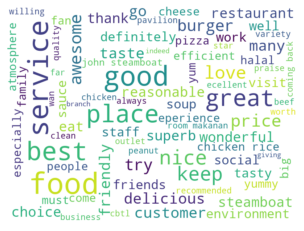

<Figure size 43200x108000 with 0 Axes>

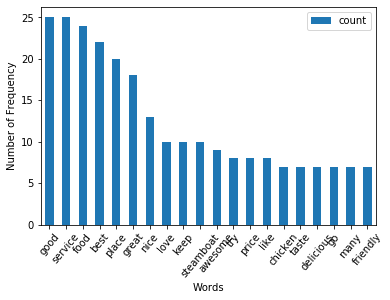

----------------------------------------------
-- NEGATIVE_REVIEW
----------------------------------------------


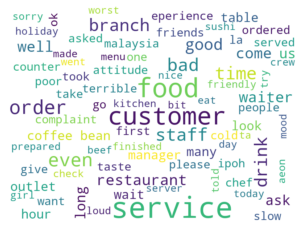

<Figure size 43200x108000 with 0 Axes>

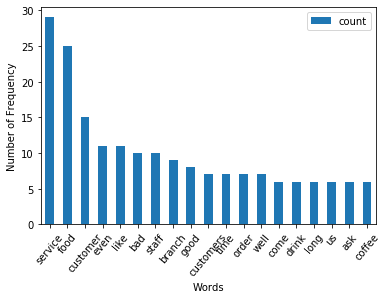

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

def create_wordcloud(label_type, text):
  wordcloud = WordCloud(background_color="white", max_words=80, max_font_size=80, width=800, height=600).generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.savefig("{}_wordcloud.png".format(label_type))
  plt.show()

def create_word_frequency(label_type, text, min_count):
  wordlist = text.split()
  wordfreq = []
  for w in wordlist:
    word=[w, wordlist.count(w)]
    if word not in wordfreq and wordlist.count(w) > min_count:
      wordfreq.append(word)

  this_df = pd.DataFrame(wordfreq)
  this_df = this_df.rename(columns={0: "word", 1:"count"})
  this_df = this_df.sort_values(by='count', ascending=False)

  plt.figure(figsize=(600,1500))
  this_df.plot.bar(x='word', y='count', rot=0)
  plt.xticks(rotation=50)
  plt.xlabel("Words")
  plt.ylabel("Number of Frequency")
  plt.savefig("{}_wordfreq.png".format(label_type))
  plt.show()


def visualize_review(label_type, obj, min_count):
  print("----------------------------------------------")
  print("-- {}".format(label_type.upper()))
  print("----------------------------------------------")

  text = ' '.join(obj)

  # GENERATE WORDCLOUD
  create_wordcloud(label_type, text)
  create_word_frequency(label_type, text, min_count)

# EXTRACT THE SENTENCE FROM REVIEW
pos_review_list = []
neg_review_list = []
for index, row in df.iterrows():
  if df["label"][index] == 1:
    pos_review_list.append(df["review"][index])
  else:
    neg_review_list.append(df["review"][index])

visualize_review("postive_review", pos_review_list, 6)
visualize_review("negative_review", neg_review_list, 5)

## Part 2: ML-SA approach: (15 points)

Classify the review into POSITIVE or NEGATIVE:

* Use all the features in DAY-5 lab (BOW, TF-IDF and doc2vec) on 3 types of classifiers: NB, SVM and LR 
* Report the F1-score, Recall and Precision and accuracy for all the features on the all the classifiers.
* What is the best classifier model for this review sentiment classification?


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [0]:
def show_percentage(x):
  return "{0:.2f}%".format(round(x, 2) * 100)

def run_ML(feature_name, xtrain, ytrain, xtest, ytest):
  print("-----------------------------------------------------------------------------")
  print("- " + feature_name)
  print("-----------------------------------------------------------------------------")

  if feature_name == "Doc2Vec":
    clf_dict = {
      'GaussianNB': GaussianNB(),
      'SVN': svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=2000, decision_function_shape='ovr', random_state=2),
      'LinearSVC': LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=30000)
    }    
  else:
    clf_dict = {
      'MultinomialNB': MultinomialNB(),
      'SVN': svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=2000, decision_function_shape='ovr', random_state=2),
      'LinearSVC': LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=30000)
    }

  for name, clf in clf_dict.items():
    clf.fit(xtrain, ytrain) 
    pred = clf.predict(xtest)
    print("-- " + name)
    print('Testing accuracy: {}'.format(show_percentage(accuracy_score(ytest, pred))))
    print('Testing F1 score: {}'.format(show_percentage(f1_score(ytest, pred, average='macro'))))
    print('Testing Precision score: {}'.format(show_percentage(precision_score(ytest, pred, average='macro'))))
    print('Testing Recall score: {} \n'.format(show_percentage(recall_score(ytest, pred, average='macro'))))    

In [0]:
features = df['review'].values
classes = df['label'].values

sentences_train, sentences_test, yy_train, yy_test = train_test_split(features, classes, test_size=0.1, random_state=42, shuffle=True)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(sentences_train.shape[0]))
print('Number of rows in the test set: {}'.format(sentences_test.shape[0]))

Number of rows in the total set: 134
Number of rows in the training set: 120
Number of rows in the test set: 14


### 2.1: Bag-Of-Words

In [0]:
BOW = CountVectorizer()
BOW.fit(sentences_train)
XX_train = BOW.transform(sentences_train)
XX_test  = BOW.transform(sentences_test)
run_ML("BOW", XX_train, yy_train, XX_test, yy_test)

-----------------------------------------------------------------------------
- BOW
-----------------------------------------------------------------------------
-- MultinomialNB
Testing accuracy: 86.00%
Testing F1 score: 85.00%
Testing Precision score: 86.00%
Testing Recall score: 89.00% 

-- SVN
Testing accuracy: 71.00%
Testing F1 score: 58.00%
Testing Precision score: 85.00%
Testing Recall score: 60.00% 

-- LinearSVC
Testing accuracy: 86.00%
Testing F1 score: 84.00%
Testing Precision score: 84.00%
Testing Recall score: 84.00% 



### 2.2: TD-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer()
TFIDF.fit_transform(sentences_train)
XXX_train = TFIDF.transform(sentences_train)
XXX_test  = TFIDF.transform(sentences_test)

run_ML("TF-IDF", XXX_train, yy_train, XXX_test, yy_test)

-----------------------------------------------------------------------------
- TF-IDF
-----------------------------------------------------------------------------
-- MultinomialNB
Testing accuracy: 71.00%
Testing F1 score: 58.00%
Testing Precision score: 85.00%
Testing Recall score: 60.00% 

-- SVN
Testing accuracy: 86.00%
Testing F1 score: 82.00%
Testing Precision score: 91.00%
Testing Recall score: 80.00% 

-- LinearSVC
Testing accuracy: 93.00%
Testing F1 score: 93.00%
Testing Precision score: 92.00%
Testing Recall score: 94.00% 



### 2.3 Doc2Vec

In [0]:
import multiprocessing
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
cores = multiprocessing.cpu_count()
from tqdm import tqdm
from sklearn import utils
import time

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

# SPLIT TO 9:1
doc2vec_train, doc2vec_test = train_test_split(df, test_size=0.1, random_state=2, shuffle=True)

# CONVERT TO DOC TO VEC FORMAT
train_tagged = doc2vec_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['review']), tags=[r.label]), axis=1)
test_tagged = doc2vec_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['review']), tags=[r.label]), axis=1)

model_dbow = Doc2Vec(dm=0, vector_size=100, negative=5, hs=1, min_count=2, sample=0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 120/120 [00:00<00:00, 260650.69it/s]


In [0]:
%%time
for epoch in range(100):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=100)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

100%|██████████| 120/120 [00:00<00:00, 446202.55it/s]


CPU times: user 53.2 s, sys: 2.76 s, total: 56 s
Wall time: 1min


In [0]:
run_ML("Doc2Vec", X_train, y_train, X_test, y_test)

-----------------------------------------------------------------------------
- Doc2Vec
-----------------------------------------------------------------------------
-- GaussianNB
Testing accuracy: 50.00%
Testing F1 score: 50.00%
Testing Precision score: 57.00%
Testing Recall score: 57.00% 

-- SVN
Testing accuracy: 79.00%
Testing F1 score: 75.00%
Testing Precision score: 78.00%
Testing Recall score: 74.00% 

-- LinearSVC
Testing accuracy: 64.00%
Testing F1 score: 59.00%
Testing Precision score: 60.00%
Testing Recall score: 59.00% 



##️️ 🙋🏼‍♂️️ 2.4 Machine Learning Sentiment Analysis Approach

Following are the sentiment performance results by using BOW, TD-IDF and DOC2Vev on 3 different Machine Leanring techniques. 

#### BOW

| Classifier | Accuracy | F1 | Precision | Recall | 
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Multinomial NB | 86.00% | 85.00% | 86.00% | 89.00% |
| SVN | 71.00% | 58.00% | 85.00% | 60.00% |
| Linear | 86.00% | 84.00% | 84.00% | 84.00% |

#### TF-IDF

| Classifier | Accuracy | F1 | Precision | Recall | 
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Multinomial NB | 71.00% | 58.00% | 85.00% | 60.00% |
| SVN | 86.00% | 82.00% | 91.00% | 80.00% |
| Linear | 93.00% | 93.00% | 92.00% | 94.00% |

#### DOC2VEC

| Classifier | Accuracy | F1 | Precision | Recall | 
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Multinomial NB | 50.00% | 50.00% | 57.00% | 57.00% |
| SVN | 79.00% | 75.00% | 78.00% | 74.00% |
| Linear | 64.00% | 59.00% | 60.00% | 59.00% |

## Part 3: ML-SA vs LEXICON-BASED (5)
Using accuracy measurement (the higher, the better), between lexicon-based approach (assignment-1) compared to ML-approach (your best classifier model ML-SA )
- a. which is the best approach?
- b. What is the reason you think the approach has the highest accuracy?

##️️ 🙋🏼‍♂️️ 3.1 Machine Learning Sentiment Analysis Approach

Please refer to [Colab File for Assignment 1](https://colab.research.google.com/drive/1t5Wr5Oj0UNii3Vabm99SQu9wLX8LbJgD) about how to generate the lexicon sentiment files and [Colab File for Assignment 2](https://colab.research.google.com/drive/1lcj5jJxzDX2726QgjgYaKe7QfRDWyDPf?authuser=1#scrollTo=G3EYMvrDiigc) for the steps and code.

### Positive Classification Result
|  | Count |
| ------------- | ------------- |
| Total Reviews | 84 | 
| Total Reviews Flagged as Neutral | 15 |
| Total Reviews Flagged as Positive | 69 |
| Total Reviews Flagged as Negative | 0 |
| Posaitive Accuracy Rate | 82.14% |
| Negative Accuracy Rate | 0.0% |

### Negative Classification Result
|  | Count |
| ------------- | ------------- |
| Total Reviews | 50 | 
| Total Reviews Flagged as Neutral | 2 |
| Total Reviews Flagged as Positive | 0 |
| Total Reviews Flagged as Negative | 49 |
| Posaitive Accuracy Rate | 0% |
| Negative Accuracy Rate | 96.00% |

##️️ 🙋🏼‍♂️️ 4.0 Result Discussion

| Approach | Feature | Classifier | Accuracy | F1 | Precision | Recall | 
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| Machine Learning | TD-IDF | Linear | 93.00% | 93.00% | 92.00% | 94.00% |

<br/>

| Approach | Accuracy | Positive Classification | Negative Classification | 
| ------------- | ------------- | ------------ | ------------- |
| Lexicon Based | 89.07% | 82.14% | 96.00% |

<br/>





